### Project by Samuel Nnamani a.k.a SammystTheAnalyst

#### You can reach out to me for collaborations, consultations, and trainings on my Social Media handles
* 1. YouTube: @SammystTheAnalyst
* 2. Facebook Page: @SammystTheAnalyst
* 3. X: @SammystDAnalyst
* 4. LinkedIn: @SammystTheAnalyst

### STEP 1: Import Libraries

In [1]:
# import necessary libraries for web scraping the scholarship descriptions
from bs4 import BeautifulSoup
import requests
import re

# import necessary libraries for data analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### STEP 2: Data Scraping

#### For this project, I scraped the scholarship title, link to apply, scholarship ad offer,  scholarship category, worth of award, scholarship amount, deadline, and grade level.

In [2]:
# Fetching the data from the website
data = []
for page in range(0, 51):
    url = "https://scholarships360.org/scholarships/top-scholarships-for-graduate-students/?sidebar_sort=relevant&current_page={page}&filter=all".format(page=page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    scholarships = soup.find_all("div", class_="re-scholarship-card-data-wrap")
    
    for scholarship in scholarships:
        sch_info = {}
        title_1 = scholarship.find('h4').text.strip()
        sch_info['Title'] = title_1.split('\t')[0]
        sch_info['Application_link'] = scholarship.find('a')["href"]
        org_offer_1 = scholarship.find('div').get_text()
        sch_info['Scholarship_Ad_Offer'] = org_offer_1.split('\n')[16]
        sch_class_1 = org_offer_1.split('\n')[17] if org_offer_1 else "Not Available"    # Isolate only the class of scholarship
        sch_info['Scholarship_category'] = re.sub(r'\$\d{1,3}(,\d{3})*', "Not Available", sch_class_1)  # Replace any $ and , values with "Not Available"
        sch_info['Worth_of_award'] = scholarship.find('span', class_="re-scholarship-card-info-name").get_text()
        sch_info['Scholarship_amount'] = scholarship.find('span', class_="re-scholarship-card-info-value").get_text()
        deadline_1 = scholarship.find('div', class_="re-scholarship-card-mob_bottom").get_text()
        sch_info['Deadline'] = deadline_1.split('\n')[13]
        sch_info['Grade_level'] = deadline_1.split('\n')[17]
        data.append(sch_info)

df = pd.DataFrame(data)

df.to_csv("scholarship_data.csv")

ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

### STEP 3: Data Analysis

#### Goals: I aim to extract insights on:
* Scholarship trends: Which scholarships are most common?
* Funding: How much money is available?
* Application deadlines: When do most scholarships open or close?
* Region/Country based opportunities: Where are scholarships available?
* Competition level: Which scholarships are easiest to get?
* Scholarship growth: How are scholarships changing overtime? Best scholarships for specific groups?

In [3]:
# Display the data

df = pd.read_csv("scholarship_data.csv")
print(df)

     Unnamed: 0                                              Title  \
0             0         “Gutsy Graduate Student” Essay Scholarship   
1             1  “Caretakers on the Climb” Scholarship for Nurs...   
2             2                     $10,000 “No Essay” Scholarship   
3             3               Niche $15,000 “No Essay” Scholarship   
4             4                    “Jump for Joy” InstaScholarship   
..          ...                                                ...   
995         995  Learning Disability Resources Foundation Award...   
996         996                      NOPHNRCSE Scholarship Program   
997         997     Sutliff & Stout Law School Scholarship Contest   
998         998                                  AJPSF Scholarship   
999         999                   Traub-Dicker Rainbow Scholarship   

                                      Application_link  \
0    https://scholarships360.org/scholarships/searc...   
1    https://scholarships360.org/scholarshi

### Understanding the data

In [4]:
# Check for the total number of rows and columns
df.shape

# Check for the info on the data
df.info()

# Describe the numerical column(s) in the dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            1000 non-null   int64 
 1   Title                 1000 non-null   object
 2   Application_link      1000 non-null   object
 3   Scholarship_Ad_Offer  93 non-null     object
 4   Scholarship_category  932 non-null    object
 5   Worth_of_award        1000 non-null   object
 6   Scholarship_amount    1000 non-null   object
 7   Deadline              1000 non-null   object
 8   Grade_level           1000 non-null   object
dtypes: int64(1), object(8)
memory usage: 70.4+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


#### From the above info, I would need to:
* 1. change the scholarship_amount into a number format.
  2. change the deadline to date format.

In [5]:
# Changing the scholarship_amount into a number format
df["Scholarship_amount"] = df["Scholarship_amount"].replace('[\$,]', '', regex=True)     # Remove the $ and , signs from the values
df["Scholarship_amount"] = pd.to_numeric(df["Scholarship_amount"], errors='coerce')      # Changes the datatype into numeric values
df["Scholarship_amount"]

# Change the deadline into date format
df["Deadline"] = pd.to_datetime(df['Deadline'], errors='coerce')
df["Deadline"]

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\HOME\AppData\Local\Temp\ipykernel_20208\2569783493.py:2: SyntaxWarning: invalid escape sequence '\$'
  df["Scholarship_amount"] = df["Scholarship_amount"].replace('[\$,]', '', regex=True)     # Remove the $ and , signs from the values


0     2026-01-31
1     2026-01-31
2     2025-06-30
3     2025-05-31
4     2025-06-30
         ...    
995          NaT
996          NaT
997          NaT
998          NaT
999          NaT
Name: Deadline, Length: 1000, dtype: datetime64[ns]

### Data Cleaning

* I am going to clean the data under some subheadings:
  1. Remove redundant columns.
  2. Missing records.
  3. Add extra columns.
  4. Outliers.
  5. Duplicatesy
  6. Remove \n and \t in the "Worth_of_award" and "Scholarship_category" columns

In [6]:
df.columns

Index(['Unnamed: 0', 'Title', 'Application_link', 'Scholarship_Ad_Offer',
       'Scholarship_category', 'Worth_of_award', 'Scholarship_amount',
       'Deadline', 'Grade_level'],
      dtype='object')

#### 1. Removing redundant columns
* I am going to remove the "Unnamed: 0" and "Scholarship_link" columns

In [7]:
df = df.drop(columns=['Unnamed: 0','Application_link'])

#### 2. Handling missing records

In [8]:
### Check for number of missing values in the dataset per column.
df.isnull().sum()

Title                     0
Scholarship_Ad_Offer    907
Scholarship_category     68
Worth_of_award            0
Scholarship_amount      230
Deadline                845
Grade_level               0
dtype: int64

#### Based on the findings, four(4) columns contain missing values, thus I will need to clean them.
* 2a. "Scholarship_Ad_Offer" ---- Replace with "No record" because the empty values are too many.
* 2b. "Scholarship_category" ---- Drop the empty values.
* 2c. "Scholarship_amount"   ---- Replace with the mean amount
* 2d. "Deadline"             ---- Replace with random date values from the date column

In [9]:
# 2a. 
df['Scholarship_Ad_Offer'] = df['Scholarship_Ad_Offer'].fillna("No record")

In [10]:
# 2b.
df['Scholarship_category'] = df['Scholarship_category'].dropna()

In [11]:
# 2c.
# Getting the mean of the amount column
amt_mean = df["Scholarship_amount"].mean()

# Replace empty values with the mean
df['Scholarship_amount'] = df['Scholarship_amount'].fillna(amt_mean2

SyntaxError: incomplete input (2496992218.py, line 6)

In [12]:
# 2d.
# Identify missing dates
missing_dates = df["Deadline"].isna()

# Get all valid (non-null) dates
valid_dates = df["Deadline"].dropna().values

# Replace missing dates with random values from the valid ones
df.loc[missing_dates, 'Deadline'] = np.random.choice(valid_dates, size=missing_dates.sum())

# Confirm that all missing values have been filled
print(df["Deadline"].isna().sum())

0


#### 3. Add extra column

In [13]:
# Create a new column called "Days until deadline", so as to get the current timeline for students
df["Days_until_deadline"] = (df["Deadline"] - pd.Timestamp.today()).dt.days

# Print the values
df["Days_until_deadline"]

0      293
1      293
2       78
3       48
4       78
      ... 
995     17
996      1
997     49
998    293
999     17
Name: Days_until_deadline, Length: 1000, dtype: int64

#### 4. Handling ouliers

In [14]:
# Outliers are usually numeric values, thus, I will check for the outliers in "Scholarship_amount" and "Days until deadline."
# I will check for unique values in each column
df["Scholarship_amount"].unique()
df["Days_until_deadline"].unique()                             # Negative values mean the deadline is past already, based on the current time.


# 4a.
# Based on the unique values above, I will check for outliers in "Scholarship_amount"
# Using IQR (Interquartile Range) method

Q1 = df["Scholarship_amount"].quantile(0.25)
Q3 = df["Scholarship_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 - 1.5 * IQR

# Filter out outliers
outliers = df[(df["Scholarship_amount"] < lower_bound) | (df["Scholarship_amount"] > upper_bound)]
print("Number of outliers:", outliers.shape[0])


# Based on the unique values above, I will check for outliers in "Days_until_deadline"
# Using IQR (Interquartile Range) method

Q11 = df["Days_until_deadline"].quantile(0.25)
Q33 = df["Days_until_deadline"].quantile(0.75)
IQR = Q33 - Q11

# Define outliers
lower_bound1 = Q11 - 1.5 * IQR
upper_bound1 = Q33 - 1.5 * IQR

# Filter out outliers
outliers2 = df[(df["Days_until_deadline"] < lower_bound1) | (df["Days_until_deadline"] > upper_bound1)]
print("Number of outliers2:", outliers2.shape[0])

Number of outliers: 770
Number of outliers2: 1000


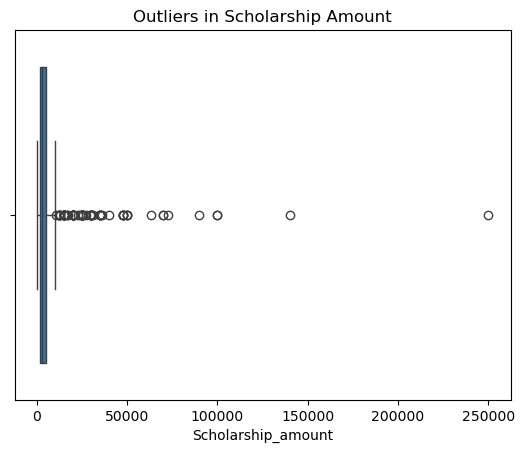

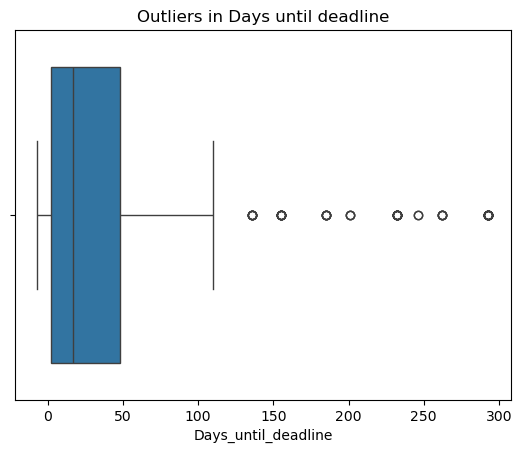

In [15]:
# 4b. 
# Visualizing outliers using a boxplot in "Scholarship_amount"
sns.boxplot(x=df["Scholarship_amount"])
plt.title("Outliers in Scholarship Amount")
plt.show()

# Visualizing outliers in the "Days until deadline" column
sns.boxplot(x=df["Days_until_deadline"])
plt.title("Outliers in Days until deadline")
plt.show()

#### 5. Handling duplicates

In [16]:
# Check for duplicates
duplicates = df[df.duplicated()]
print(f"\nNumber of duplicate rows: {len(duplicates)}")

# There are no duplicate values


Number of duplicate rows: 0


#### 6. Remove \n and \t in the "Worth_of_award" and "Scholarship_category" columns

In [17]:
df["Worth_of_award"] = df["Worth_of_award"].str.replace(r'[\n\t]', '', regex=True)
df["Scholarship_category"] = df["Scholarship_category"].str.replace(r'[\n\t]', '', regex=True)
print(df['Scholarship_category'])

0                          Exclusive
1                          Exclusive
2                          Exclusive
3                          Sponsored
4                          Exclusive
                   ...              
995                 Laptop or Tablet
996                    Not Available
997                    Not Available
998    Not Available - Not Available
999                    Not Available
Name: Scholarship_category, Length: 1000, dtype: object


### Analysis and Visualization

 1. Trends in Scholarship Availability (Time Series Analysis)
 2. Most Common Scholarship Categories
 3. Scholarship Amount Distribution
 4. Which organization offer the Most Scholarships?
 5. Scholarship Deadline Analysis
 6. Regional Availability of Scholarships.

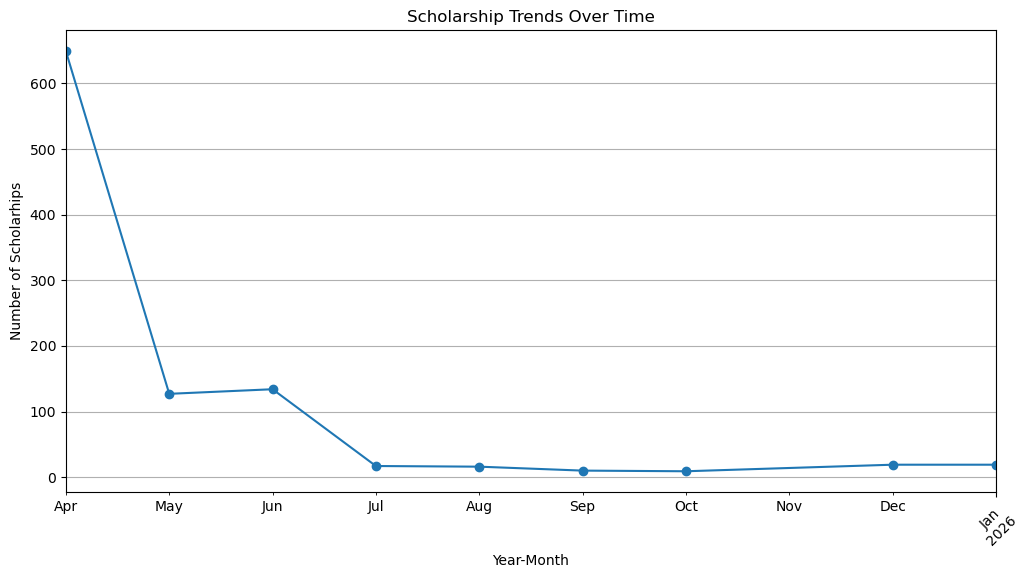

In [18]:
# 1. Trends in Scholarship Availability (Time Series Analysis)
# Goal: Analyze how the number of scholarships varies over time.
# Since the deadline column has already been converted to a datetime, I will extract the year and month

# Extracting the Year and Month
df["Year-Month"] = df["Deadline"].dt.to_period("M")

# Count scholarships per month
scholarships_per_month = df.groupby("Year-Month").size()

# plot time series
plt.figure(figsize=(12, 6))
scholarships_per_month.plot(marker='o', linestyle='-')
plt.title("Scholarship Trends Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Scholarhips")
plt.xticks(rotation=45)
plt.grid()
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_20208\3542041080.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


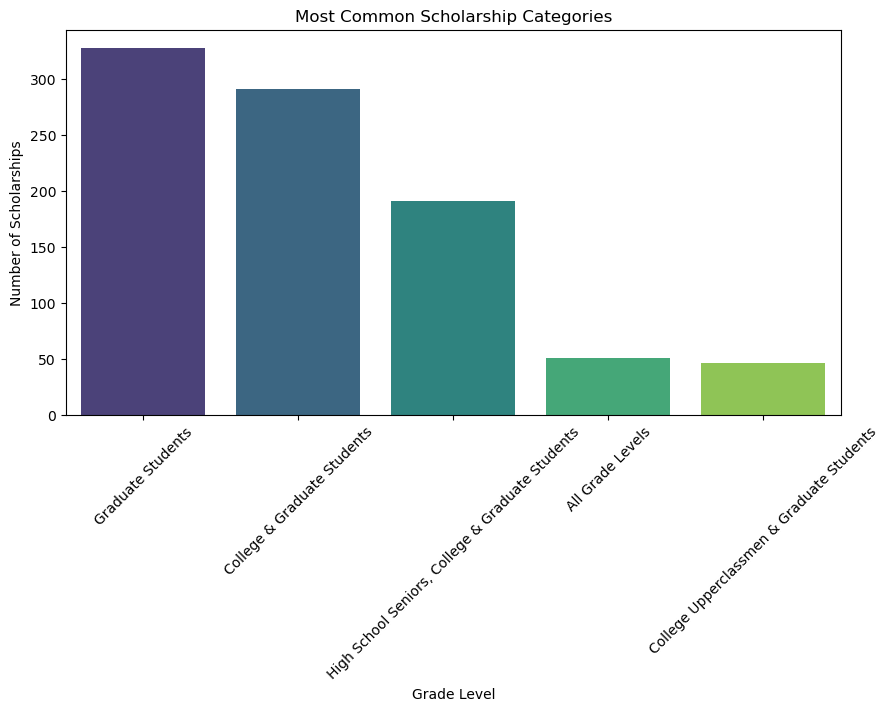

In [19]:
# 2. Most Common Scholarship Categories
# Goal: Identify the most frequent scholarship types.

# Count Scholarships by category
category_counts = df['Grade_level'].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Most Common Scholarship Categories")
plt.xlabel("Grade Level")
plt.ylabel("Number of Scholarships")
plt.xticks(rotation=45)
plt.show()

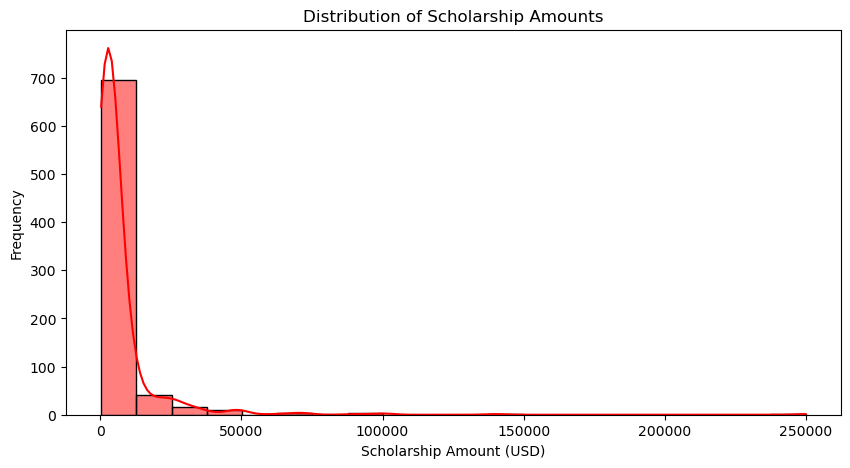

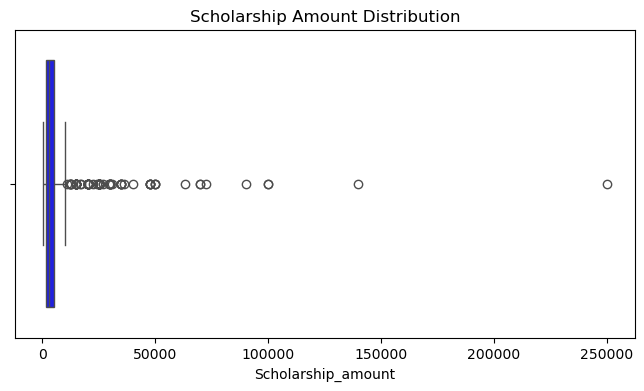

In [20]:
# 3. Scholarship Amount Distribution
# Goal: Analyze the financial value of scholarships
# Since the Scholarship amount column has already been converted to numbers, I will plot the histogram

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Scholarship_amount"].dropna(), bins=20, kde=True, color='Red')
plt.title("Distribution of Scholarship Amounts")
plt.xlabel("Scholarship Amount (USD)")
plt.ylabel("Frequency")
plt.show()

# Boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["Scholarship_amount"], color="blue")
plt.title("Scholarship Amount Distribution")
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_20208\921214601.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_providers.index, y=top_providers.values, palette="coolwarm")


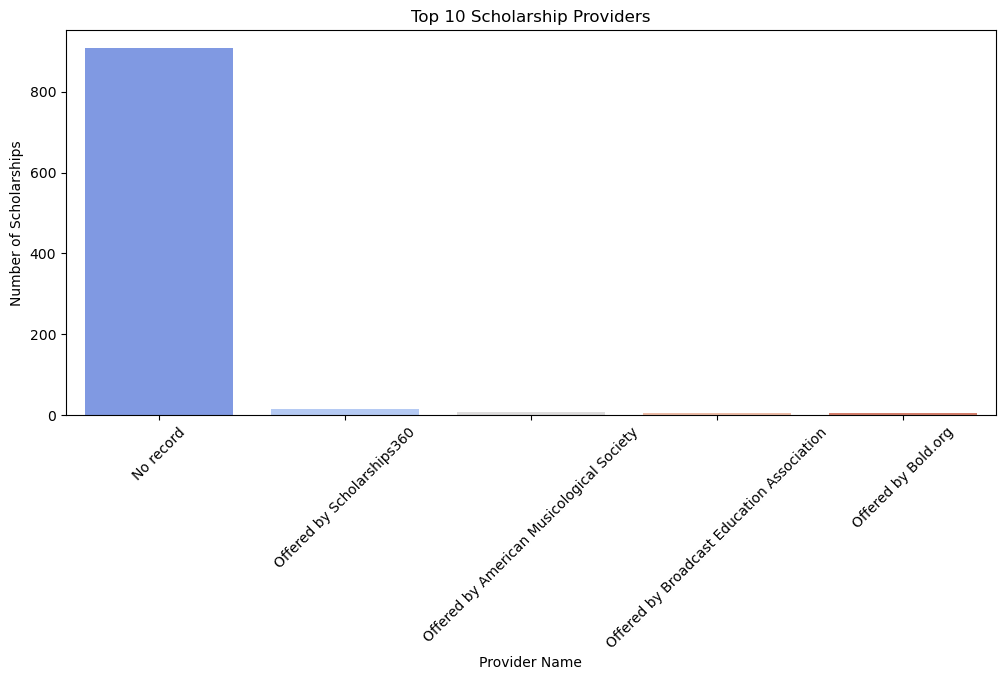

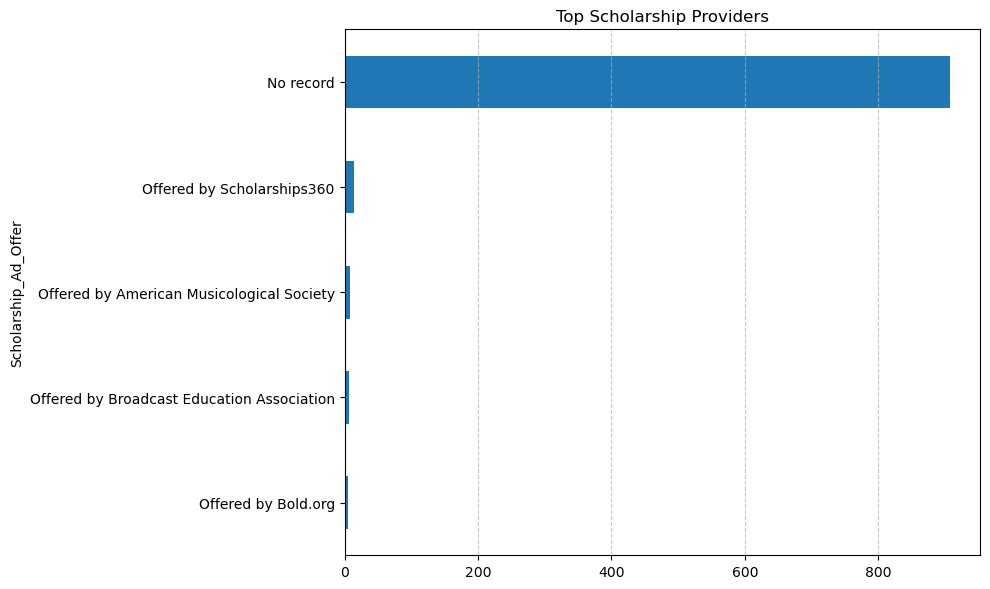

In [34]:
# 4. Which Organizations Offer the Most Scholarships?
# Goal: Identify the most active scholarship providers.

# Figure 4a
# Count scholarships per provider: The Top 5
top_providers = df["Scholarship_Ad_Offer"].value_counts().head(5)

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=top_providers.index, y=top_providers.values, palette="coolwarm")
plt.title("Top 10 Scholarship Providers")
plt.xlabel("Provider Name")
plt.ylabel("Number of Scholarships")
plt.xticks(rotation=45)
plt.show()

# Figure 4b
# The Top 5 Scholarship Providers
top_providers = df['Scholarship_Ad_Offer'].value_counts().head(5)

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
top_providers.sort_values().plot(kind='barh', title='Top Scholarship Providers')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

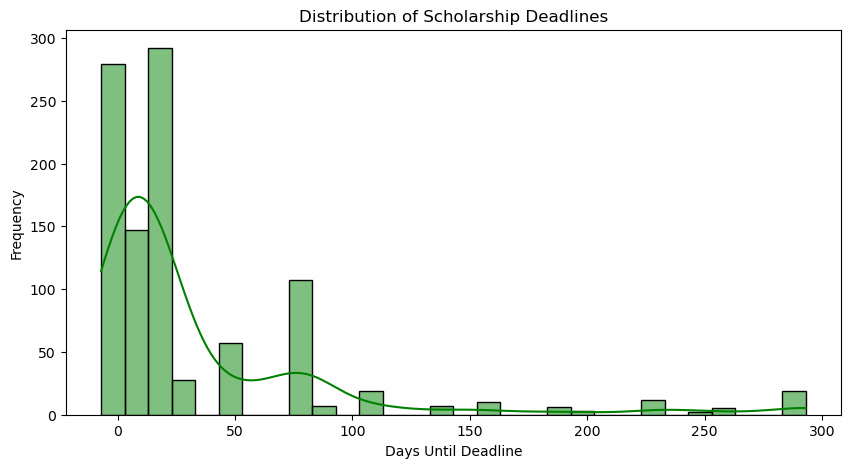

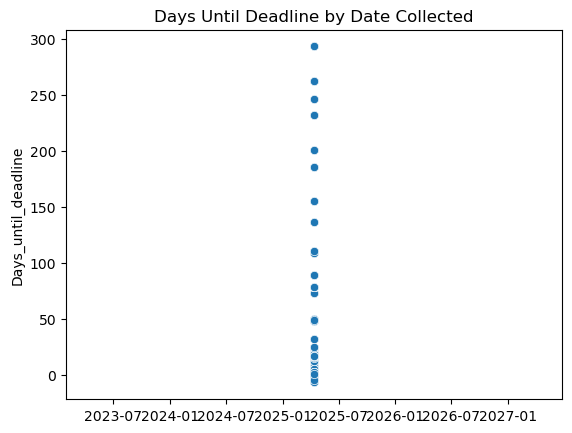

In [27]:
# 5. Scholarship Deadline Analysis
# Goal: Understand how much time students have to apply.
# Since I have created the new column "Days until deadline", I am going to use the new column for this analysis and visualization.

# Plot histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Days_until_deadline'].dropna(), bins=30, kde=True, color="Green")
plt.title("Distribution of Scholarship Deadlines")
plt.xlabel("Days Until Deadline")
plt.ylabel("Frequency")
plt.show()

# Goal: To show how close the deadlines are, after publishing
sns.scatterplot(x= pd.Timestamp.today(), y='Days_until_deadline', data=df)
plt.title('Days Until Deadline by Date Collected')
plt.show()

C:\Users\HOME\AppData\Local\Temp\ipykernel_20208\1558523123.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=award_count.index, y = award_count.values, palette="magma", legend=False)


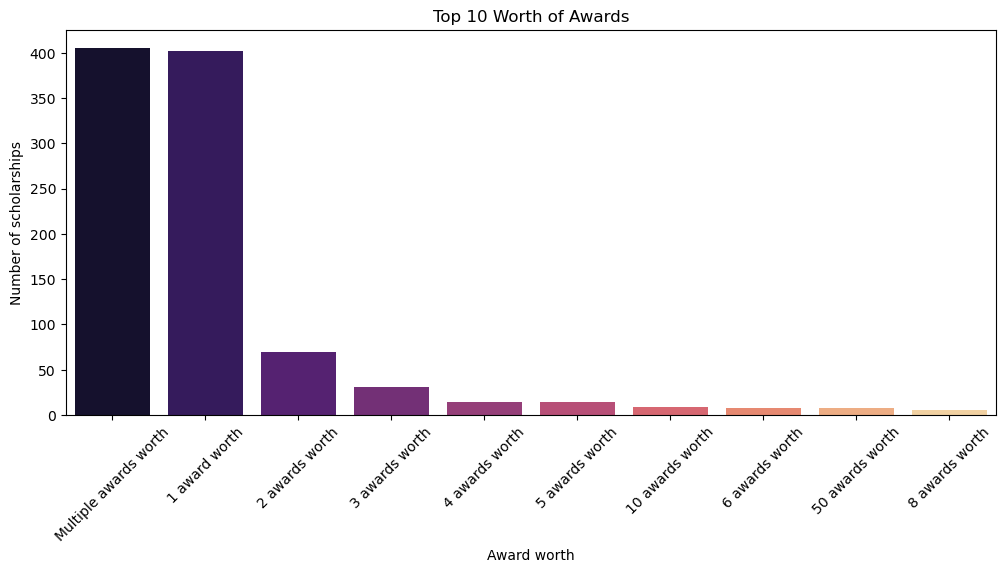

In [24]:
# 6. Worth of Award Analysis
# Goal: To ascertain the worth of awards in each scholarship record

# Count scholarships per awards
award_count = df["Worth_of_award"].value_counts().head(10)     # Top 10 awards

# There seems to be the phrase "up to" in the column, and that, in a way, overshadows the results. Thus, I need to remove it.
df["Worth_of_award"] = df["Worth_of_award"].str.replace(r'(?i) up to.*', '', regex=True).str.strip()

# Plot bar chart
plt.figure(figsize=(12, 5))
sns.barplot(x=award_count.index, y = award_count.values, palette="magma", legend=False)
plt.title("Top 10 Worth of Awards")
plt.xlabel("Award worth")
plt.ylabel("Number of scholarships")
plt.xticks(rotation=45)
plt.show()

In [25]:
df

,Title,Scholarship_Ad_Offer,Scholarship_category,Worth_of_award,Scholarship_amount,Deadline,Grade_level,Days_until_deadline,Year-Month
0,“Gutsy Graduate Student” Essay Scholarship,Offered by Scholarships360,Exclusive,1 award worth,1000.0,2026-01-31,Graduate Students,293,2026-01
1,“Caretakers on the Climb” Scholarship for Nurs...,Offered by Scholarships360,Exclusive,1 award worth,1000.0,2026-01-31,College & Graduate Students,293,2026-01
2,"$10,000 “No Essay” Scholarship",Offered by Scholarships360,Exclusive,1 award worth,10000.0,2025-06-30,All Grade Levels,78,2025-06
3,"Niche $15,000 “No Essay” Scholarship",Offered by Niche,Sponsored,1 award worth,15000.0,2025-05-31,All Grade Levels,48,2025-05
4,“Jump for Joy” InstaScholarship,Offered by Scholarships360,Exclusive,1 award worth,500.0,2025-06-30,All Grade Levels,78,2025-06
...,...,...,...,...,...,...,...,...,...
995,Learning Disability Resources Foundation Award...,No record,Laptop or Tablet,Multiple awards worth,NaN,2025-04-30,"College Freshman, College Sophomore, College J...",17,2025-04
996,NOPHNRCSE Scholarship Program,No record,Not Available,4 awards worth,1000.0,2025-04-14,"High School Senior, College Freshman, College ...",1,2025-04
997,Sutliff & Stout Law School Scholarship Contest,No record,Not Available,1 award worth,1500.0,2025-06-01,Graduate Students,49,2025-06
998,AJPSF Scholarship,No record,Not Available - Not Available,1 award worth,NaN,2026-01-31,"High School Seniors, College & Graduate Students",293,2026-01
